In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score
from sklearn.tree import DecisionTreeClassifier
import sklearn
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [87]:
plt.rcParams["figure.figsize"] = (15,8)

In [262]:
train = pd.read_csv('Train_Set.csv')

In [263]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126363 entries, 0 to 126362
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OrderId             126363 non-null  int64  
 1   Customer_Id         126363 non-null  int64  
 2   Customer_Category   126363 non-null  object 
 3   Cust_State          126363 non-null  object 
 4   Zipcode             126363 non-null  int64  
 5   Sales               122749 non-null  float64
 6   Order_zone          126363 non-null  object 
 7   Price               126363 non-null  float64
 8   CategoryName        126363 non-null  object 
 9   Transcation         126363 non-null  object 
 10  Dept_Id             126363 non-null  int64  
 11  Dept_Name           126363 non-null  object 
 12  Profit_Ratio        126363 non-null  float64
 13  Discount            121313 non-null  float64
 14  Quantity            126363 non-null  int64  
 15  Order_Profit        126363 non-nul

In [264]:
train.head()

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,...,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Delivery_Status
0,2477882,12386,Consumer,AR,19120,150.0,Central,4383.39,Cat-2,UPI,...,191.0,1592.0,0,Standard,4,NORTH,5.0,2.0,0,0
1,2477895,2630,Consumer,BR,2907,165.0,East,4295.72,Cat-2,UPI,...,79.0,1420.0,0,Standard,6,NORTH,2.0,2.0,1,0
2,2473260,1752,Corporate,RJ,90214,171.0,South,3616.65,Cat-50,Cash,...,67.0,1231.0,0,Standard,6,SOUTH,4.0,2.0,0,1
3,2466916,9268,Consumer,UP,745,132.0,East,9175.86,Cat-12,Credit,...,45.0,NaN,1,2A,4,NORTH,4.0,3.0,1,1
4,2351480,2888,Corporate,UP,92427,NaN,North,2779.29,Cat-3,UPI,...,43.0,1018.0,1,Standard,5,CENTRAL,2.0,1.0,0,1


In [265]:
train['Sales'] = train['Sales'].fillna(train['Sales'].mean())
train['Discount'] = train['Discount'].fillna(train['Discount'].mean())
train['ProductLength'] = train['ProductLength'].fillna(train['ProductLength'].mean())
train['ProductWeight'] = train['ProductWeight'].fillna(train['ProductWeight'].mean())

# 

# 

# 

# 

# 

# 

In [266]:
train['Delivery_Review'].fillna(train['Delivery_Review'].mode()[0],inplace=True)
train['Session_Ordered'].fillna(train['Session_Ordered'].mode()[0],inplace=True)

In [267]:
train['Quantity'] = train['Quantity'].astype(object)
train['Dispatched'] = train['Dispatched'].astype(object)
train['Scheduled_Shipping'] = train['Scheduled_Shipping'].astype(object)
train['Delivery_Review'] = train['Delivery_Review'].astype(object)
train['Session_Ordered'] = train['Session_Ordered'].astype(object)
train['WeekdayOrder'] = train['WeekdayOrder'].astype(object)

In [268]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126363 entries, 0 to 126362
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OrderId             126363 non-null  int64  
 1   Customer_Id         126363 non-null  int64  
 2   Customer_Category   126363 non-null  object 
 3   Cust_State          126363 non-null  object 
 4   Zipcode             126363 non-null  int64  
 5   Sales               126363 non-null  float64
 6   Order_zone          126363 non-null  object 
 7   Price               126363 non-null  float64
 8   CategoryName        126363 non-null  object 
 9   Transcation         126363 non-null  object 
 10  Dept_Id             126363 non-null  int64  
 11  Dept_Name           126363 non-null  object 
 12  Profit_Ratio        126363 non-null  float64
 13  Discount            126363 non-null  float64
 14  Quantity            126363 non-null  object 
 15  Order_Profit        126363 non-nul

In [269]:
train['StateRegion'] = train['Cust_State'].replace(['JK','HR','HP','UK','UP'],'NORTH')
train['StateRegion'] = train['StateRegion'].replace(['RJ','GJ','MP','MA'],'WEST')
train['StateRegion'] = train['StateRegion'].replace(['KL','TEL','AP','KA'],'SOUTH')
train['StateRegion'] = train['StateRegion'].replace(['WB','PB','OR','AR','BR'],'EAST')


In [270]:
train = train.drop(['Dept_Id','CategoryName','Cust_State','Customer_Id'],axis=1)

In [255]:
train.describe()

,OrderId,Zipcode,Sales,Price,Profit_Ratio,Discount,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight,Delivery_Status
count,1.263630e+05,126363.000000,126363.000000,126363.000000,126363.000000,126363.000000,126363.000000,126363.000000,126363.000000,126363.000000,126363.000000
mean,2.431880e+06,35961.067029,196.119952,10064.758724,0.124273,0.105450,1257.016748,31.863030,95.976178,3747.630431,0.328031
std,5.212524e+04,37550.046447,119.699363,9923.788862,0.467546,0.070869,6690.787375,15.652067,54.713277,7598.853566,0.469498
min,2.341525e+06,12.000000,28.000000,617.310000,-2.750000,0.000000,-271606.420000,2.000000,10.000000,10.000000,0.000000
25%,2.386692e+06,742.000000,114.000000,3587.760000,0.080000,0.040000,314.080000,18.000000,52.000000,764.000000,0.000000
50%,2.432005e+06,19168.000000,177.000000,4415.280000,0.280000,0.105450,1258.740000,29.000000,85.000000,1649.000000,0.000000
75%,2.477044e+06,78219.000000,257.000000,14222.400000,0.370000,0.160000,3119.900000,45.000000,139.000000,2745.000000,1.000000
max,2.522043e+06,99225.000000,1969.000000,142151.340000,0.500000,0.250000,68156.670000,76.000000,210.000000,43999.000000,1.000000


In [256]:
train.shape

(126363, 25)

In [257]:
train_cat = train.select_dtypes(include='object')
train_num = train.select_dtypes(include='number')

In [258]:
vif_df = pd.DataFrame()
vif_df["VIF_Factor"] = [vif(train_num.drop('Delivery_Status',axis=1).values, i) for i in range(train_num.drop('Delivery_Status',axis=1).shape[1])]
vif_df["Features"] = train_num.drop('Delivery_Status',axis=1).columns
vif_df.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,15.609253,OrderId
1,9.351931,Sales
2,6.916055,Prod_Category_Id
3,6.286128,Price
4,5.107135,ProductLength
5,3.313617,Discount
6,2.223767,Order_Profit
7,2.210931,Profit_Ratio
8,1.909425,Zipcode
9,1.571786,ProductWeight


<AxesSubplot:>

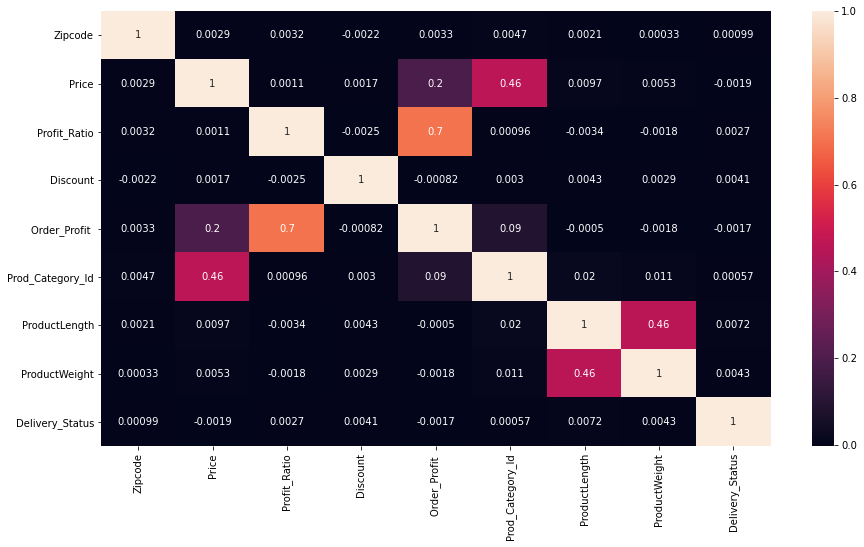

In [103]:
sns.heatmap(train_num.drop('Sales',axis=1).corr(),annot=True)

In [104]:
for i in train_cat.columns:
    print(i)
    print(train_cat[i].value_counts())
    print()
    print()

Customer_Category
Consumer     65464
Corporate    38360
others       22539
Name: Customer_Category, dtype: int64


Order_zone
North      25375
South      25327
East       25257
Central    25230
West       25174
Name: Order_zone, dtype: int64


Transcation
Debit     48586
UPI       34947
Credit    29113
Cash      13717
Name: Transcation, dtype: int64


Dept_Name
Fan Shop              46834
Apparel               34328
Golf                  23209
Footwear              10142
Outdoors               6794
Fitness                1736
Discs Shop             1455
Technology             1014
Pet Shop                336
Book Shop               272
Health and Beauty       243
Name: Dept_Name, dtype: int64


Quantity
1    69417
5    14306
4    14304
3    14224
2    14112
Name: Quantity, dtype: int64


Product_type
Not Fragile    71204
Fragile        55159
Name: Product_type, dtype: int64


Dispatched
0    76543
1    49820
Name: Dispatched, dtype: int64


Shipping_Class
Standard    75433
2A          

In [271]:

train['Dept_Name_masked']  = train['Dept_Name'].replace(['Fan Shop','Discs Shop','Pet Shop','Book Shop'],'shops')
train['Dept_Name_masked']  = train['Dept_Name_masked'] .replace(['Apparel','Footwear','Health and Beauty '],'Fashion')
train['Dept_Name_masked']  = train['Dept_Name_masked'] .replace(['Golf','Fitness','Outdoors','Technology'],'activity')

In [272]:
train.drop(['Dept_Name'],axis=True,inplace=True)

In [273]:
train.columns

Index(['OrderId', 'Customer_Category', 'Zipcode', 'Sales', 'Order_zone',
       'Price', 'Transcation', 'Profit_Ratio', 'Discount', 'Quantity',
       'Order_Profit ', 'Product_type', 'Prod_Category_Id', 'ProductLength',
       'ProductWeight', 'Dispatched', 'Shipping_Class', 'Scheduled_Shipping',
       'Warehouse_Region', 'Delivery_Review', 'Session_Ordered',
       'WeekdayOrder', 'Delivery_Status', 'StateRegion', 'Dept_Name_masked'],
      dtype='object')

Customer_Id


C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


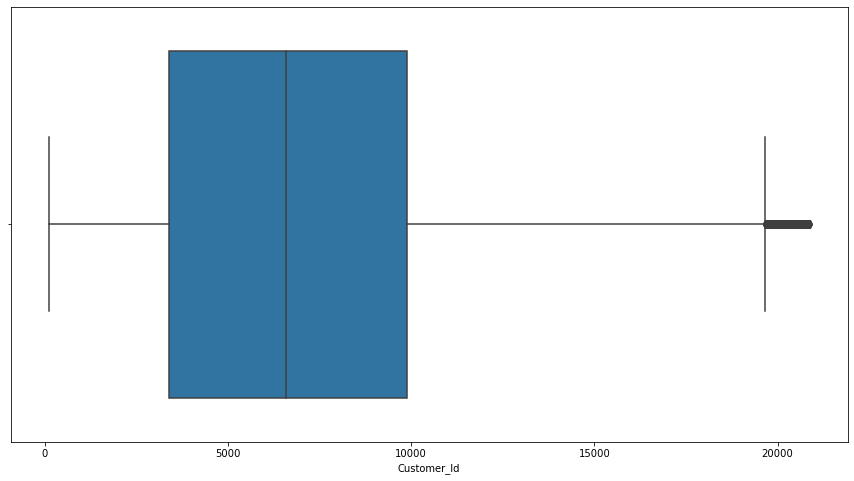

Zipcode


C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


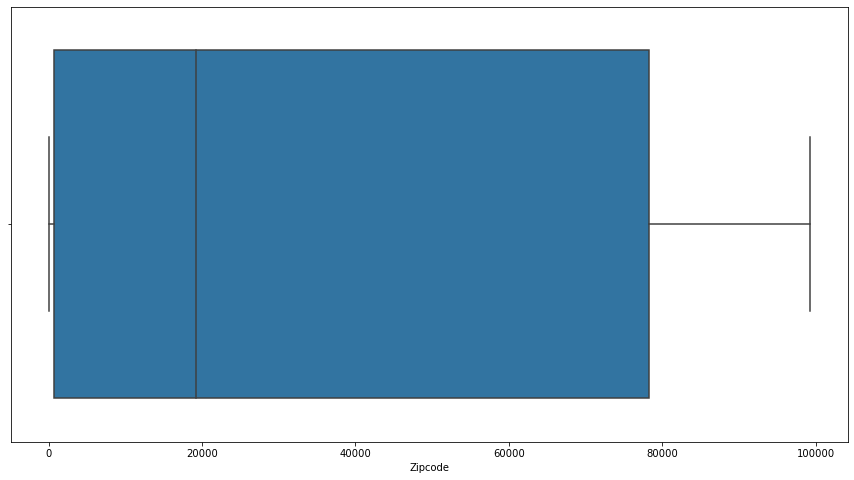

Sales


C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


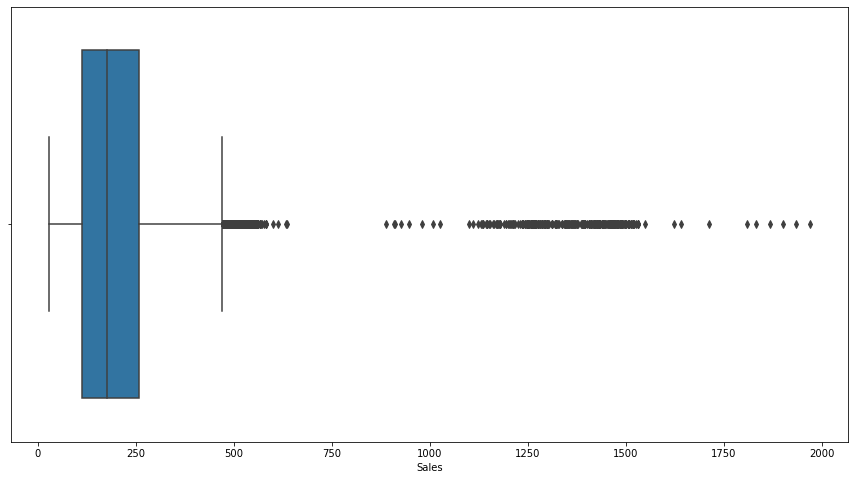

Price


C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


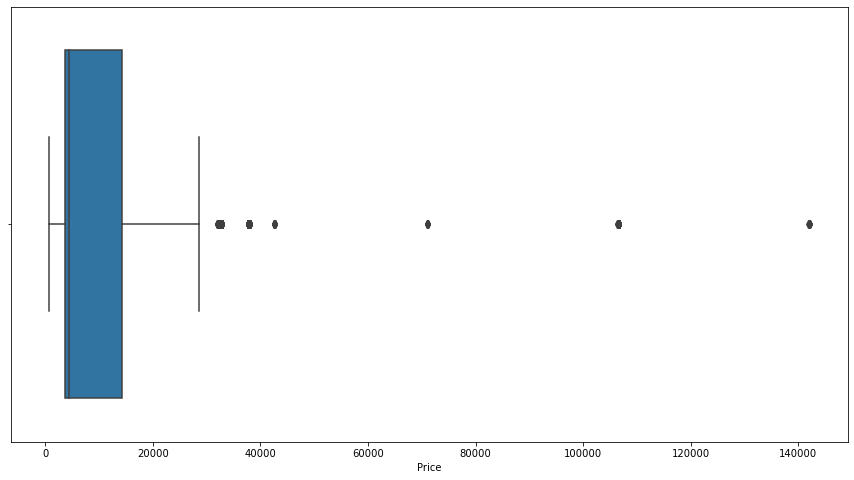

C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Profit_Ratio


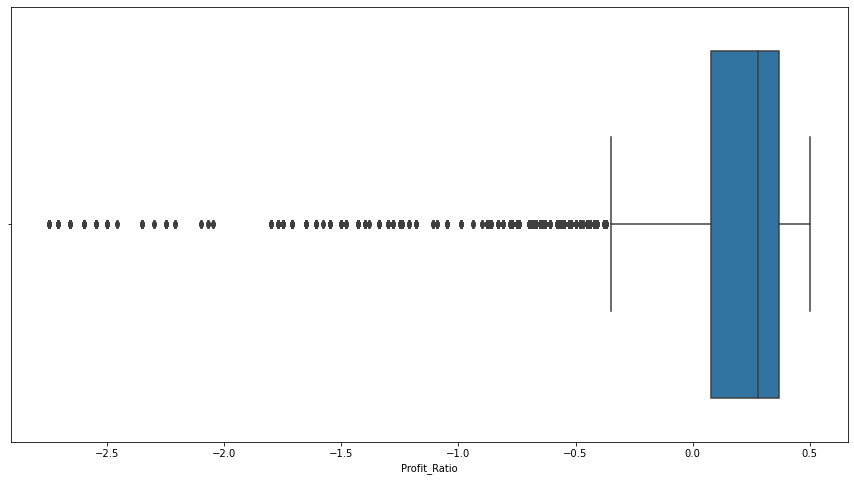

C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Discount


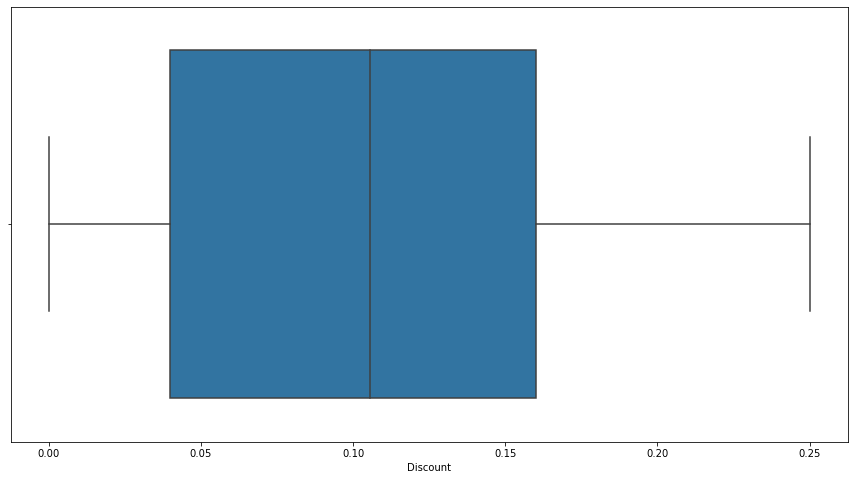

C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Order_Profit 


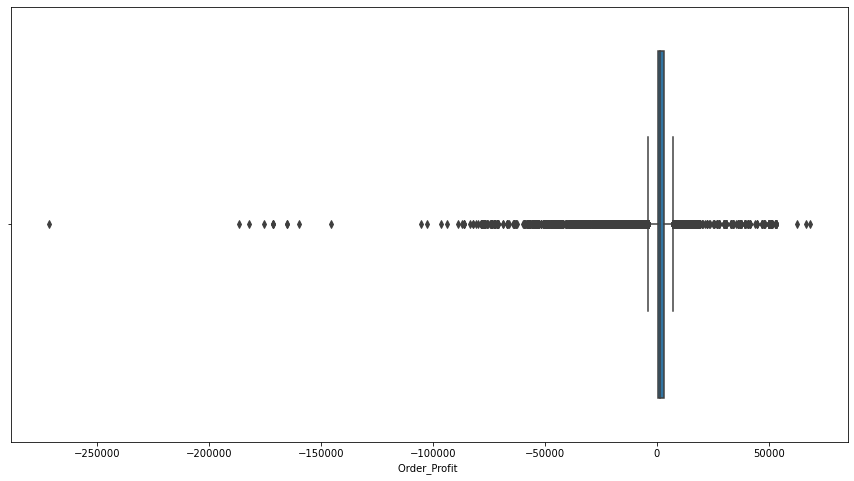

C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Prod_Category_Id


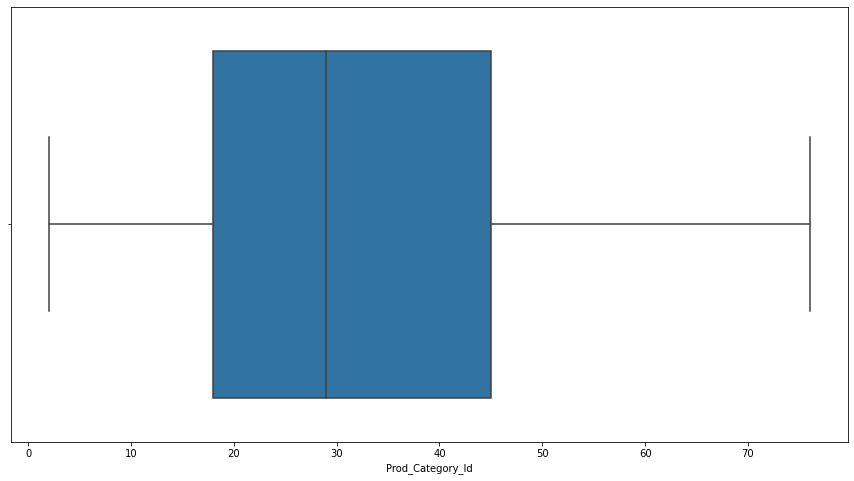

C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ProductLength


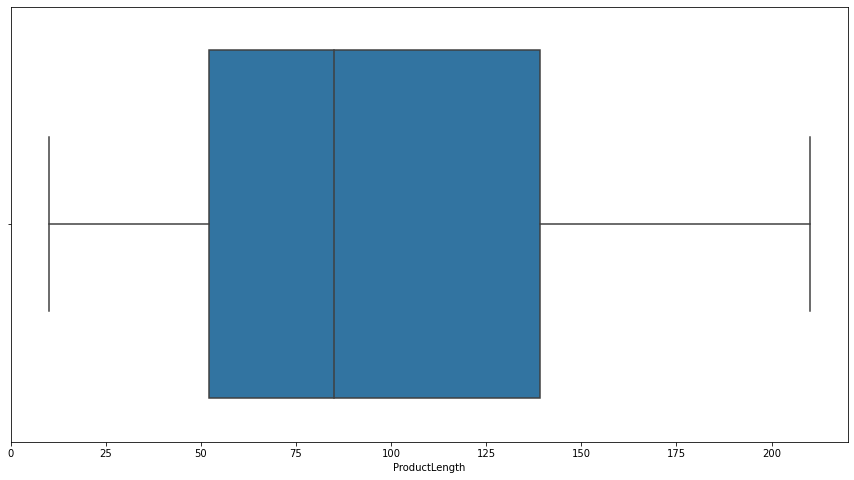

ProductWeight


C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


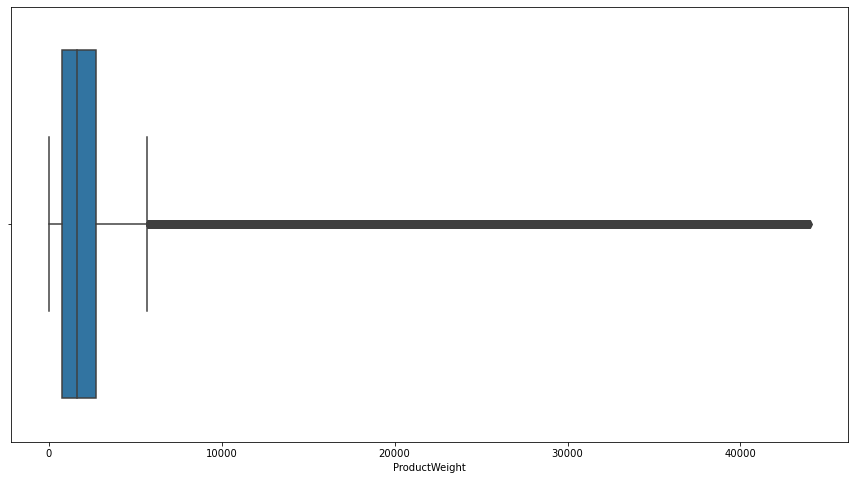

Delivery_Status


C:\Users\aniru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


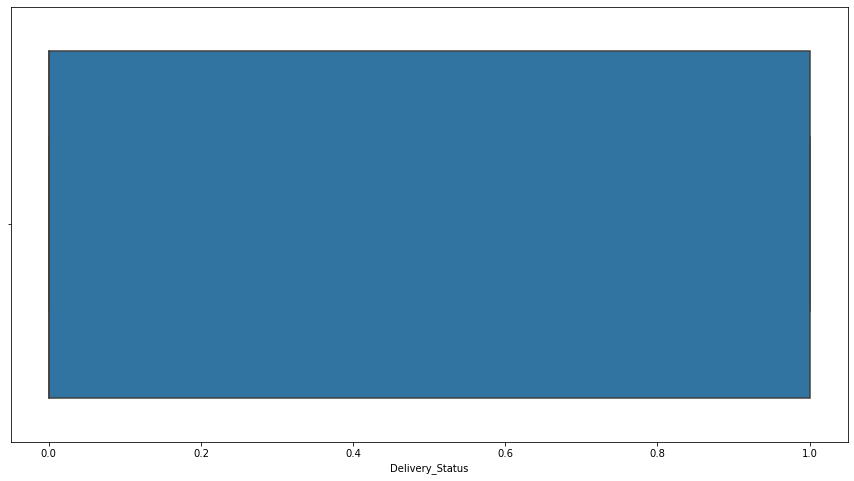

In [59]:
for i in train_num.columns:
    print(i)
    sns.boxplot(train_num[i])
    plt.show()

In [124]:
train_df.shape # after masking product names

(126363, 50)

In [160]:
train_num.shape

(126363, 10)

In [278]:
Q1 = train.quantile(0.25)

# calculate the third quartile
Q3 = train.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)
train_otlrs = train[~((train < (Q1 - 3 * IQR)) | (train> (Q3 + 3 * IQR))).any(axis=1)]

# check the shape of the data
train_otlrs.shape

(105492, 25)

In [279]:
train_df = pd.get_dummies(train_otlrs,drop_first=True)

In [275]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126363 entries, 0 to 126362
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   OrderId                      126363 non-null  int64  
 1   Zipcode                      126363 non-null  int64  
 2   Sales                        126363 non-null  float64
 3   Price                        126363 non-null  float64
 4   Profit_Ratio                 126363 non-null  float64
 5   Discount                     126363 non-null  float64
 6   Order_Profit                 126363 non-null  float64
 7   Prod_Category_Id             126363 non-null  int64  
 8   ProductLength                126363 non-null  float64
 9   ProductWeight                126363 non-null  float64
 10  Delivery_Status              126363 non-null  int64  
 11  Customer_Category_Corporate  126363 non-null  uint8  
 12  Customer_Category_others     126363 non-null  uint8  
 13 

In [280]:
X = train_df.drop(['Delivery_Status'],axis=1)
y = train_df['Delivery_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [281]:
gb = GradientBoostingClassifier()
gb_model = gb.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15459  5759]
 [ 2188  8242]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80     21218
           1       0.59      0.79      0.67     10430

    accuracy                           0.75     31648
   macro avg       0.73      0.76      0.74     31648
weighted avg       0.78      0.75      0.76     31648



In [240]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [30, 50],
                     'max_depth': [10, 15]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)


# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 3)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 50} 



In [282]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15726  5492]
 [ 2607  7823]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80     21218
           1       0.59      0.75      0.66     10430

    accuracy                           0.74     31648
   macro avg       0.72      0.75      0.73     31648
weighted avg       0.77      0.74      0.75     31648



In [235]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16017  5201]
 [ 3207  7223]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79     21218
           1       0.58      0.69      0.63     10430

    accuracy                           0.73     31648
   macro avg       0.71      0.72      0.71     31648
weighted avg       0.75      0.73      0.74     31648



In [283]:
xg=XGBClassifier(learning_rate= 0.1,max_depth=3, n_estimators=100, random_state= 42)
xg_model = xg.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

C:\Users\aniru\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:20:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[15418  5800]
 [ 2128  8302]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80     21218
           1       0.59      0.80      0.68     10430

    accuracy                           0.75     31648
   macro avg       0.73      0.76      0.74     31648
weighted avg       0.78      0.75      0.76     31648



In [212]:
tuning_parameters = {'learning_rate': [0.1, 0.01,0.001],
                     'max_depth': [3,5,7],
                     'n_estimators':[100,200,400],
                     'random_state':[42]
                    }

# instantiate the 'XGBClassifier' 
grb_model = GradientBoostingClassifier()

gb_grid = GridSearchCV(estimator = grb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
gb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', gb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42} 



In [213]:
gb_grid_model = GradientBoostingClassifier(learning_rate = gb_grid.best_params_.get('learning_rate'),
                               max_depth = gb_grid.best_params_.get('max_depth'),
                              n_estimators = gb_grid.best_params_.get('n_estimators'),
                            random_state=42)

# use fit() to fit the model on the train set
gb_model = gb_grid_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13269  5193]
 [ 1903  6947]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79     18462
           1       0.57      0.78      0.66      8850

    accuracy                           0.74     27312
   macro avg       0.72      0.75      0.73     27312
weighted avg       0.78      0.74      0.75     27312



In [286]:
base_learners = [('xg_model', XGBClassifier(learning_rate= 0.1,max_depth=3, n_estimators=100, random_state= 42)),
                 ('grb_model',GradientBoostingClassifier(learning_rate = gb_grid.best_params_.get('learning_rate'),
                               max_depth = gb_grid.best_params_.get('max_depth'),
                              n_estimators = gb_grid.best_params_.get('n_estimators'),
                            random_state=42))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GradientBoostingClassifier())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

C:\Users\aniru\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aniru\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aniru\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aniru\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aniru\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aniru\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('xg_model',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.1,
                                              max_delta_step=None, max_depth=3,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                               

In [287]:
y_pred = stack_model.predict(X_test)#2learners with #2cols masked #1.5 outlers
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14521  6697]
 [ 1304  9126]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     21218
           1       0.58      0.87      0.70     10430

    accuracy                           0.75     31648
   macro avg       0.75      0.78      0.74     31648
weighted avg       0.81      0.75      0.75     31648



In [288]:
f1_score(y_test,y_pred)

0.695234830305108

In [183]:
y_pred = stack_model.predict(X_test)#2learners with #2cols masked #outlers
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14332  6886]
 [ 1168  9262]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     21218
           1       0.57      0.89      0.70     10430

    accuracy                           0.75     31648
   macro avg       0.75      0.78      0.74     31648
weighted avg       0.81      0.75      0.75     31648



In [184]:
f1_score(y_test,y_pred)

0.696967416660396

In [177]:
y_pred = stack_model.predict(X_test)#3learners with #2cols masked
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14587  6631]
 [ 1373  9057]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.78     21218
           1       0.58      0.87      0.69     10430

    accuracy                           0.75     31648
   macro avg       0.75      0.78      0.74     31648
weighted avg       0.80      0.75      0.75     31648



In [20]:
y_pred = stack_model.predict(X_test)#2learners
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17322  8294]
 [ 1533 10760]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     25616
           1       0.56      0.88      0.69     12293

    accuracy                           0.74     37909
   macro avg       0.74      0.78      0.73     37909
weighted avg       0.80      0.74      0.75     37909



In [70]:
y_pred = stack_model.predict(X_test)#3 learners
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17572  8044]
 [ 1697 10596]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.78     25616
           1       0.57      0.86      0.69     12293

    accuracy                           0.74     37909
   macro avg       0.74      0.77      0.73     37909
weighted avg       0.80      0.74      0.75     37909



In [67]:
tuning_parameters = {'learning_rate': [0.1, 0.3, 0.01],
                     'max_depth': [5,10],
                     'n_estimators': range(100,150,10)}

# instantiate the 'XGBClassifier' 
grb = GradientBoostingClassifier()

xgb_grid = GridSearchCV(estimator = grb, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 140} 



In [68]:
grb_grid_model = GradientBoostingClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              n_estimators = xgb_grid.best_params_.get('n_estimators'))

# use fit() to fit the model on the train set
grb_model = grb_grid_model.fit(X_train, y_train)


In [69]:
y_pred = grb_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20651  4965]
 [ 5045  7248]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     25616
           1       0.59      0.59      0.59     12293

    accuracy                           0.74     37909
   macro avg       0.70      0.70      0.70     37909
weighted avg       0.74      0.74      0.74     37909



In [239]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7145475227502528
[[16775  4443]
 [ 4591  5839]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     21218
           1       0.57      0.56      0.56     10430

    accuracy                           0.71     31648
   macro avg       0.68      0.68      0.68     31648
weighted avg       0.71      0.71      0.71     31648



In [70]:
xg=XGBClassifier()
xg_model = xg.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

C:\Users\aniru\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7368434936294811
[[18676  6940]
 [ 3036  9257]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79     25616
           1       0.57      0.75      0.65     12293

    accuracy                           0.74     37909
   macro avg       0.72      0.74      0.72     37909
weighted avg       0.77      0.74      0.74     37909



In [141]:
test = pd.read_csv('Test_Set.csv')

In [142]:
test['Sales'] = test['Sales'].fillna(test['Sales'].mean())
test['Discount'] = test['Discount'].fillna(test['Discount'].mean())
test['ProductLength'] = test['ProductLength'].fillna(test['ProductLength'].mean())
test['ProductWeight'] = test['ProductWeight'].fillna(test['ProductWeight'].mean())

In [143]:
test['Delivery_Review'].fillna(test['Delivery_Review'].mode()[0],inplace=True)
test['Session_Ordered'].fillna(test['Session_Ordered'].mode()[0],inplace=True)

In [144]:
test['Quantity'] = test['Quantity'].astype(object)
test['Dispatched'] = test['Dispatched'].astype(object)
test['Scheduled_Shipping'] = test['Scheduled_Shipping'].astype(object)
test['Delivery_Review'] = test['Delivery_Review'].astype(object)
test['Session_Ordered'] = test['Session_Ordered'].astype(object)
test['WeekdayOrder'] = test['WeekdayOrder'].astype(object)

In [145]:
test['StateRegion'] = test['Cust_State'].replace(['JK','HR','HP','UK','UP'],'NORTH')
test['StateRegion'] = test['StateRegion'].replace(['RJ','GJ','MP','MA'],'WEST')
test['StateRegion'] = test['StateRegion'].replace(['KL','TEL','AP','KA'],'SOUTH')
test['StateRegion'] = test['StateRegion'].replace(['WB','PB','OR','AR','BR'],'EAST')

In [146]:
test['Dept_Name_masked']  = test['Dept_Name'].replace(['Fan Shop','Discs Shop','Pet Shop','Book Shop'],'shops')
test['Dept_Name_masked']  = test['Dept_Name_masked'] .replace(['Apparel','Footwear','Health and Beauty '],'Fashion')
test['Dept_Name_masked']  = test['Dept_Name_masked'] .replace(['Golf','Fitness','Outdoors'],'activity')
test['Dept_Name_masked']  = test['Dept_Name_masked'] .replace(['Technology'],'tech')

In [147]:
test = test.drop(['Dept_Id','CategoryName','Cust_State','OrderId','Customer_Id','Dept_Name'],axis=1)

In [148]:
test_df = pd.get_dummies(test,drop_first=True)

In [149]:
test_df.shape

(54156, 49)

In [150]:
test = pd.read_csv('Test_Set.csv')

In [227]:
y_pred_test = stack_model.predict(test_df)
y_pred_series = pd.Series(y_pred_test)

orderid = test['OrderId']

data = {"OrderId": orderid,
        "Delivery_Status": y_pred_series}
  
df = pd.concat(data,axis = 1)

In [228]:
f1_score(y_test,y_pred)

0.6995807307264481

In [229]:
df.Delivery_Status.value_counts()

1    27485
0    26671
Name: Delivery_Status, dtype: int64

In [186]:
df.Delivery_Status.value_counts()

1    27862
0    26294
Name: Delivery_Status, dtype: int64

In [179]:
df.Delivery_Status.value_counts()

0    27105
1    27051
Name: Delivery_Status, dtype: int64

In [152]:
df.Delivery_Status.value_counts()

1    27243
0    26913
Name: Delivery_Status, dtype: int64

In [72]:
df.Delivery_Status.value_counts()

0    27346
1    26810
Name: Delivery_Status, dtype: int64

In [230]:
df.set_index("OrderId", inplace = True)
submission_data_1 = df.to_csv('2 cols masked satdy aftnun 1.5outlier only xg and grb final as xg.csv', index = True)

In [37]:
y_pred_test = xg_model.predict(test_df)
y_pred_series = pd.Series(y_pred_test)

orderid = test['OrderId']

data = {"OrderId": orderid,
        "Delivery_Status": y_pred_series}
  
df = pd.concat(data,axis = 1)

In [38]:
df.Delivery_Status.value_counts()

0    30892
1    23264
Name: Delivery_Status, dtype: int64

In [40]:
y_pred_test = gb_model.predict(test_df)
y_pred_series = pd.Series(y_pred_test)

orderid = test['OrderId']

data = {"OrderId": orderid,
        "Delivery_Status": y_pred_series}
  
df = pd.concat(data,axis = 1)

In [41]:
df.Delivery_Status.value_counts()

0    29401
1    24755
Name: Delivery_Status, dtype: int64

In [205]:
bg=RandomForestClassifier()
bg_model = bg.fit(X_train,y_train)
y_pred = bg_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13835  4627]
 [ 2642  6208]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     18462
           1       0.57      0.70      0.63      8850

    accuracy                           0.73     27312
   macro avg       0.71      0.73      0.71     27312
weighted avg       0.75      0.73      0.74     27312



In [237]:
estimate= [("Grad boost",gb_model),("xg",xg_model)]
#  Losti : 1,   Bag:  1, Gra: 1, Xg: 0

VC2=VotingClassifier(estimators=estimate, voting='hard')  # Bagging Classifier
model_vc=VC2.fit(X_train, y_train)
y_pred_vc=model_vc.predict(X_test)
accuracy_score(y_test,y_pred_vc)
print(classification_report(y_test,y_pred))

C:\Users\aniru\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.72      0.79     21218
           1       0.58      0.79      0.67     10430

    accuracy                           0.75     31648
   macro avg       0.73      0.76      0.73     31648
weighted avg       0.78      0.75      0.75     31648



In [ ]:
#vif on current model and reduce dimensions by using feature engineering